# Relevant Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
# import seaborn as sns
# sns.set()

# Load the Data

In [2]:
raw_data = pd.read_csv(r"C:\Users\Tauseef\Deep_Learning\2-Regression\dataset\GPAvsETEA_dummies.csv")

In [3]:
raw_data

,ETEA,GPA,Attendance
0,428.50,2.40,0
1,416.00,2.52,0
2,440.00,2.54,0
3,421.25,2.74,0
4,423.25,2.83,0
...,...,...,...
79,484.00,3.71,0
80,452.50,3.71,0
81,496.75,3.73,0
82,490.50,3.76,1


# Map the Data

In [4]:
data = raw_data.copy()

In [5]:
data.describe()

,ETEA,GPA,Attendance
count,84.000000,84.000000,84.000000
mean,461.318452,3.330238,0.476190
std,26.132665,0.271617,0.502432
min,408.500000,2.400000,0.000000
25%,443.000000,3.190000,0.000000
50%,461.500000,3.380000,0.000000
75%,483.500000,3.502500,1.000000
max,512.500000,3.810000,1.000000


# Regression

In [6]:
y = data['GPA']
x1 = data[['ETEA','Attendance']]

In [7]:
x = sm.add_constant(x1)

In [8]:
result = sm.OLS(y,x).fit()

In [9]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    GPA   R-squared:                       0.416
Model:                            OLS   Adj. R-squared:                  0.402
Method:                 Least Squares   F-statistic:                     28.90
Date:                Sun, 13 Mar 2022   Prob (F-statistic):           3.36e-10
Time:                        18:49:45   Log-Likelihood:                 13.417
No. Observations:                  84   AIC:                            -20.83
Df Residuals:                      81   BIC:                            -13.54
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2570      0.408      0.630      0.530      -0.555       1.069
ETEA           0.0066      0.001      7.486      0.000       0.005       0.008
Attendance     0.0553      0.046      1.205      0.232      -0.036       0.147
==============================================================================
Omnibus:                        9.679   Durbin-Watson:                   0.950
Prob(Omnibus):                  0.008   Jarque-Bera (JB):               11.319
Skew:                          -0.579   Prob(JB):                      0.00348
Kurtosis:                       4.377   Cond. No.                     8.22e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.22e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

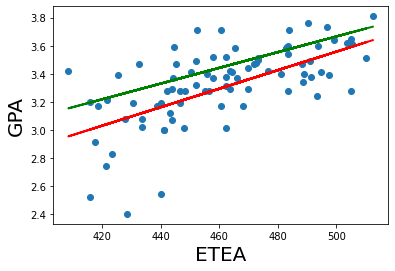

In [26]:
plt.scatter(data['ETEA'],y)
yhat_no = 0.2570+0.0066*data['ETEA']
yhat_yes = 0.8655+0.0056*data['ETEA']
fig = plt.plot(data['ETEA'],yhat_no, lw=2, c ='red')
fig = plt.plot(data['ETEA'],yhat_yes, lw=2, c ='green')
plt.xlabel('ETEA',fontsize = 20)
plt.ylabel('GPA',fontsize = 20)
plt.show()

# Make Predictions

In [27]:
new_data = pd.DataFrame({'const':1,'ETEA':[505,454],'Attendance':[0,1]})
new_data = new_data[['const','ETEA','Attendance']]
new_data

,const,ETEA,Attendance
0,1,505,0
1,1,454,1


In [28]:
predications = result.predict(new_data)
print(predications)

0    3.592419
1    3.310857
dtype: float64


In [29]:
predictiondf = pd.DataFrame({'predications':predications})
joined = new_data.join(predictiondf)
joined.rename(index={0:'Dady-yanki',1:'Travis Scot'})

,const,ETEA,Attendance,predications
Dady-yanki,1,505,0,3.592419
Travis Scot,1,454,1,3.310857
